# L1-SVM vs L2-SVM: using the Barrier and SMO algorithms

In [ ]:
%cd ..

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time

from sklearn.metrics import confusion_matrix, classification_report

from opt.svm import SVC
from opt.utils.data_splitter import split4ovr, split4ovo
from opt.utils.metrics import measure_performance

# Fix random seed
np.random.seed(0)

## Dataset

In [ ]:
# This code block is used for reducing the MNIST dataset
# from opt.utils.preprocess import process_raw_data
# process_raw_data(input_filepath='data/mnist/', 
#                  output_filepath='data/filtered_mnist', 
#                  classes2keep=[0,1,6,9],
#                  nTrain=500,
#                  nTest=200)

In [3]:
# Load data
data = np.load('data/filtered_mnist.npz')
x_train = data['a']
y_train = data['b']
x_test  = data['c']
y_test  = data['d']
print("Number of training samples:       ", len(y_train))
print("Distribution of training samples: ", Counter(y_train))
print("Number of test samples:           ", len(y_test))
print("Distribution of training samples: ", Counter(y_test))

Number of training samples:        2000
Distribution of training samples:  Counter({6: 500, 0: 500, 9: 500, 1: 500})
Number of test samples:            800
Distribution of training samples:  Counter({6: 200, 9: 200, 0: 200, 1: 200})


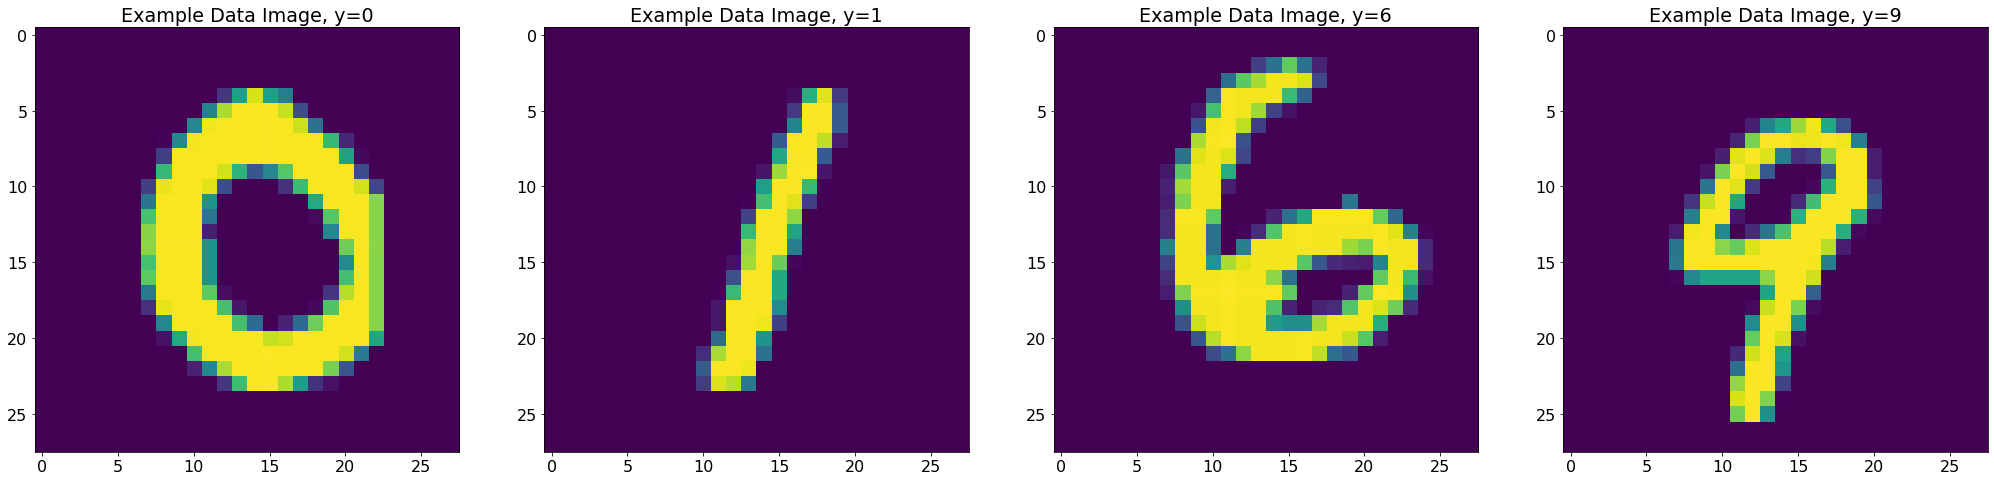

In [4]:
# Visualise data
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(35,35))
imx, imy = (28,28)
visual = np.reshape(x_train[2], (imx,imy))
ax1.set_title("Example Data Image, y="+str(int(y_train[2])))
ax1.imshow(visual, vmin=0, vmax=1)
visual = np.reshape(x_train[36], (imx,imy))
ax2.set_title("Example Data Image, y="+str(int(y_train[36])))
ax2.imshow(visual, vmin=0, vmax=1)
visual = np.reshape(x_train[10], (imx,imy))
ax3.set_title("Example Data Image, y="+str(int(y_train[10])))
ax3.imshow(visual, vmin=0, vmax=1)
visual = np.reshape(x_train[8], (imx,imy))
ax4.set_title("Example Data Image, y="+str(int(y_train[8])))
ax4.imshow(visual, vmin=0, vmax=1)
# plt.savefig("report/report_pics/data.pdf", format="pdf")

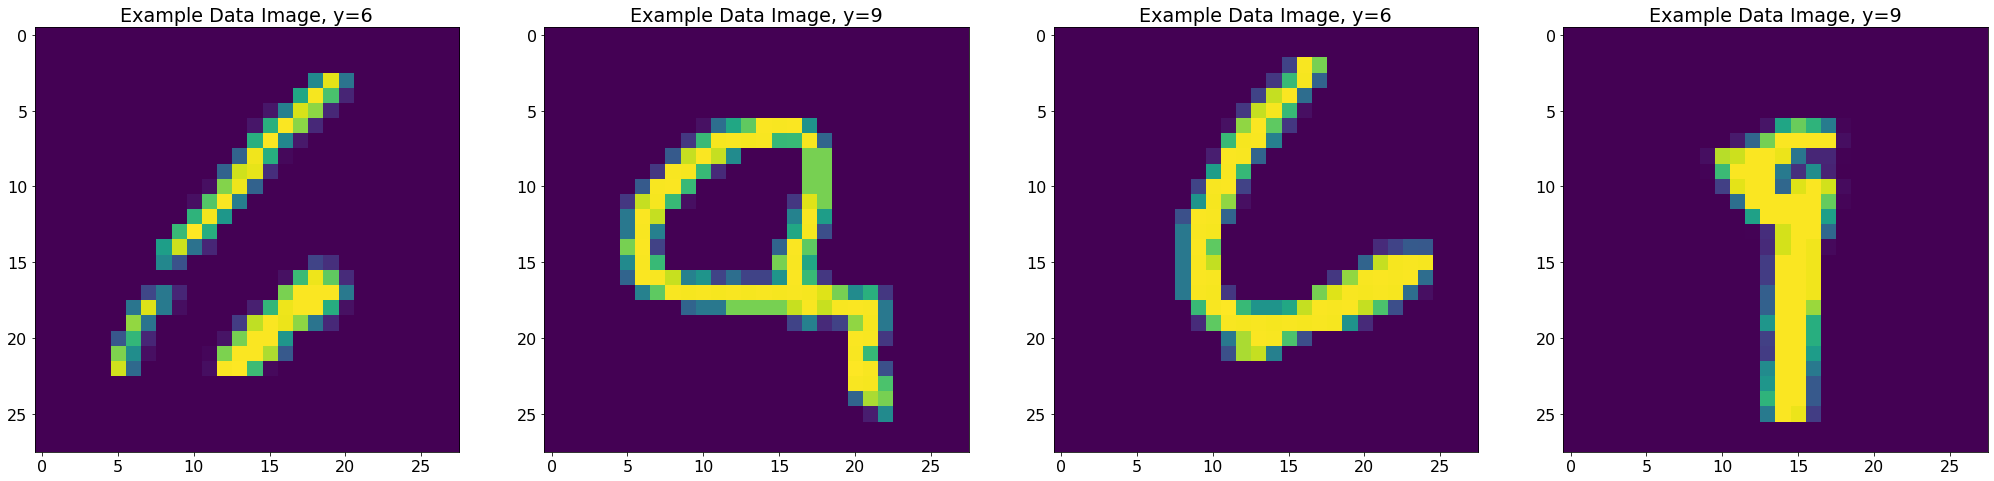

In [33]:
# # Visualise data
# plt.rcParams.update({'font.size': 16})
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(35,35))
# imx, imy = (28,28)
# visual = np.reshape(x_test[10], (imx,imy))
# ax1.set_title("Example Data Image, y="+str(int(y_test[10])))
# ax1.imshow(visual, vmin=0, vmax=1)
# visual = np.reshape(x_test[412], (imx,imy))
# ax2.set_title("Example Data Image, y="+str(int(y_test[412])))
# ax2.imshow(visual, vmin=0, vmax=1)
# visual = np.reshape(x_test[524], (imx,imy))
# ax3.set_title("Example Data Image, y="+str(int(y_test[524])))
# ax3.imshow(visual, vmin=0, vmax=1)
# visual = np.reshape(x_test[636], (imx,imy))
# ax4.set_title("Example Data Image, y="+str(int(y_test[636])))
# ax4.imshow(visual, vmin=0, vmax=1)


# # plt.savefig("report/report_pics/bad_data.pdf", format="pdf")

## Barrier method

In [5]:
# OVO data
x_train_ovo, y_train_ovo = split4ovo(x_train, y_train)

# OVR data: y_train_ovr = split4ovr(y_train)
# Train OVR: svm.fit(x_train, y_train_ovr)

In [6]:
# Initialise L1-SVM
L1_barrier_svm = SVC(C=1.0, 
                     kernel="gauss", 
                     param='scale', 
                     decision_function_shape="ovo",
                     loss_fn='L1',
                     opt_algo="barrier")

# Barrier fit
L1_barrier_svm.fit(x_train_ovo, y_train_ovo,
                   t=1, 
                   mu=20, 
                   tol=1e-6, 
                   max_iter=100,
                   tolNewton=1e-12,
                   maxIterNewton=100)

# Test
L1_barrier_yhat = L1_barrier_svm.predict(x_test)
print("Time taken: ", L1_barrier_svm.time_taken)
measure_performance(y_test, L1_barrier_yhat, average="macro")

Barrier method iteration:  0


/Users/udeepa/Documents/UCL/Term 2/numerical/svm/opt/algos/interior_point.py:313: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(self.h - self.G@x))


Barrier method iteration:  1
Barrier method iteration:  2
Barrier method iteration:  3
Barrier method iteration:  4
Barrier method iteration:  5
Barrier method iteration:  6
Barrier method iteration:  7
Barrier method iteration:  8
Barrier method iteration:  0
Barrier method iteration:  1
Barrier method iteration:  2
Barrier method iteration:  3
Barrier method iteration:  4
Barrier method iteration:  5
Barrier method iteration:  6
Barrier method iteration:  7
Barrier method iteration:  8
Barrier method iteration:  0
Barrier method iteration:  1
Barrier method iteration:  2
Barrier method iteration:  3
Barrier method iteration:  4
Barrier method iteration:  5
Barrier method iteration:  6
Barrier method iteration:  7
Barrier method iteration:  8
Barrier method iteration:  0
Barrier method iteration:  1
Barrier method iteration:  2
Barrier method iteration:  3
Barrier method iteration:  4
Barrier method iteration:  5
Barrier method iteration:  6
Barrier method iteration:  7
Barrier method

,Accuracy,Precision,Recall,F1,MCC
0,0.9338,0.9338,0.9338,0.9336,0.9118


In [7]:
# Initialise L2-SVM
L2_barrier_svm = SVC(C=1.0, 
                     kernel="gauss", 
                     param='scale', 
                     decision_function_shape="ovo",
                     loss_fn='L2',
                     opt_algo="barrier")

# Barrier fit
L2_barrier_svm.fit(x_train_ovo, y_train_ovo,
                   t=1, 
                   mu=20, 
                   tol=1e-6, 
                   max_iter=100,
                   tolNewton=1e-12,
                   maxIterNewton=100)

# Test
L2_barrier_yhat = L2_barrier_svm.predict(x_test)
print("Time taken: ", L2_barrier_svm.time_taken)
measure_performance(y_test, L2_barrier_yhat, average="macro")

Barrier method iteration:  0


/Users/udeepa/Documents/UCL/Term 2/numerical/svm/opt/algos/interior_point.py:313: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(self.h - self.G@x))


Barrier method iteration:  1
Barrier method iteration:  2
Barrier method iteration:  3
Barrier method iteration:  4
Barrier method iteration:  5
Barrier method iteration:  6
Barrier method iteration:  7
Barrier method iteration:  0
Barrier method iteration:  1
Barrier method iteration:  2
Barrier method iteration:  3
Barrier method iteration:  4
Barrier method iteration:  5
Barrier method iteration:  6
Barrier method iteration:  7
Barrier method iteration:  0
Barrier method iteration:  1
Barrier method iteration:  2
Barrier method iteration:  3
Barrier method iteration:  4
Barrier method iteration:  5
Barrier method iteration:  6
Barrier method iteration:  7
Barrier method iteration:  0
Barrier method iteration:  1
Barrier method iteration:  2
Barrier method iteration:  3
Barrier method iteration:  4
Barrier method iteration:  5
Barrier method iteration:  6
Barrier method iteration:  7
Barrier method iteration:  0
Barrier method iteration:  1
Barrier method iteration:  2
Barrier method

,Accuracy,Precision,Recall,F1,MCC
0,0.9725,0.9728,0.9725,0.9725,0.9634


#### Convergence Plots

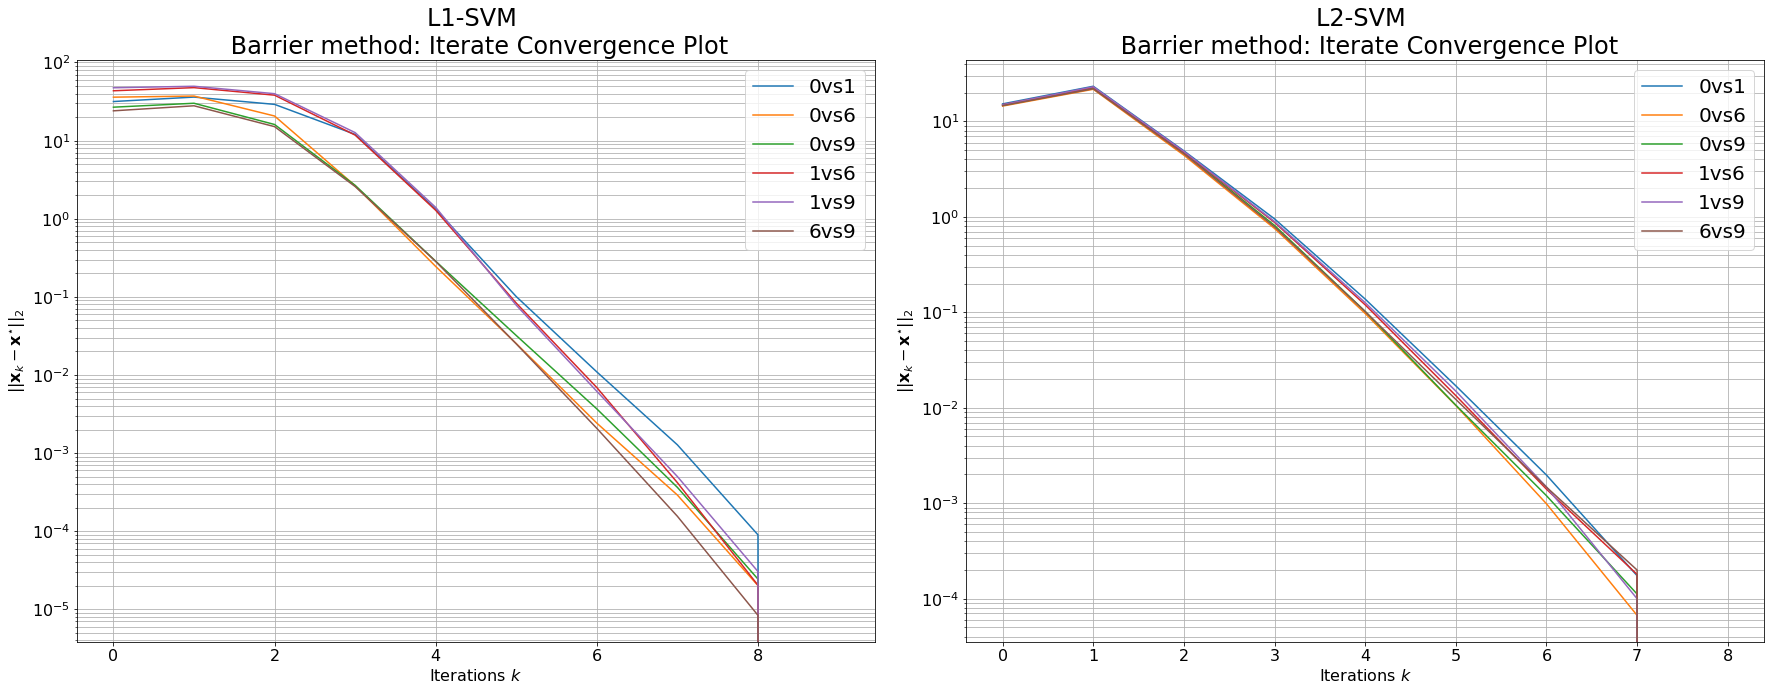

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,10))
plt.rcParams.update({'font.size': 20})

# L1-SVM
for ClassVsClass, info in L1_barrier_svm.opt_info.items():
    ax1.plot(np.linalg.norm(np.array(info['iterates'])-info['x'], axis=1), label=ClassVsClass)
ax1.set_title("L1-SVM \n Barrier method: Iterate Convergence Plot")
ax1.set_ylabel("$|| \mathbf{x}_k-\mathbf{x}^{\star} ||_2$")
ax1.set_xlabel("Iterations $k$")
ax1.set_yscale("log")
ax1.legend()
ax1.grid(which='both', axis='both') 
  
# L2-SVM
for ClassVsClass, info in L2_barrier_svm.opt_info.items():
    ax2.plot(np.linalg.norm(np.array(info['iterates'])-info['x'], axis=1), label=ClassVsClass)
ax2.set_title("L2-SVM \n Barrier method: Iterate Convergence Plot")
ax2.set_ylabel("$|| \mathbf{x}_k-\mathbf{x}^{\star} ||_2$")
ax2.set_xlabel("Iterations $k$")
ax2.set_yscale("log")
ax2.legend()
ax2.grid(which='both', axis='both') 

plt.tight_layout()
# plt.savefig("report/report_pics/barrier_iterate_conv.pdf", format="pdf")
plt.show()

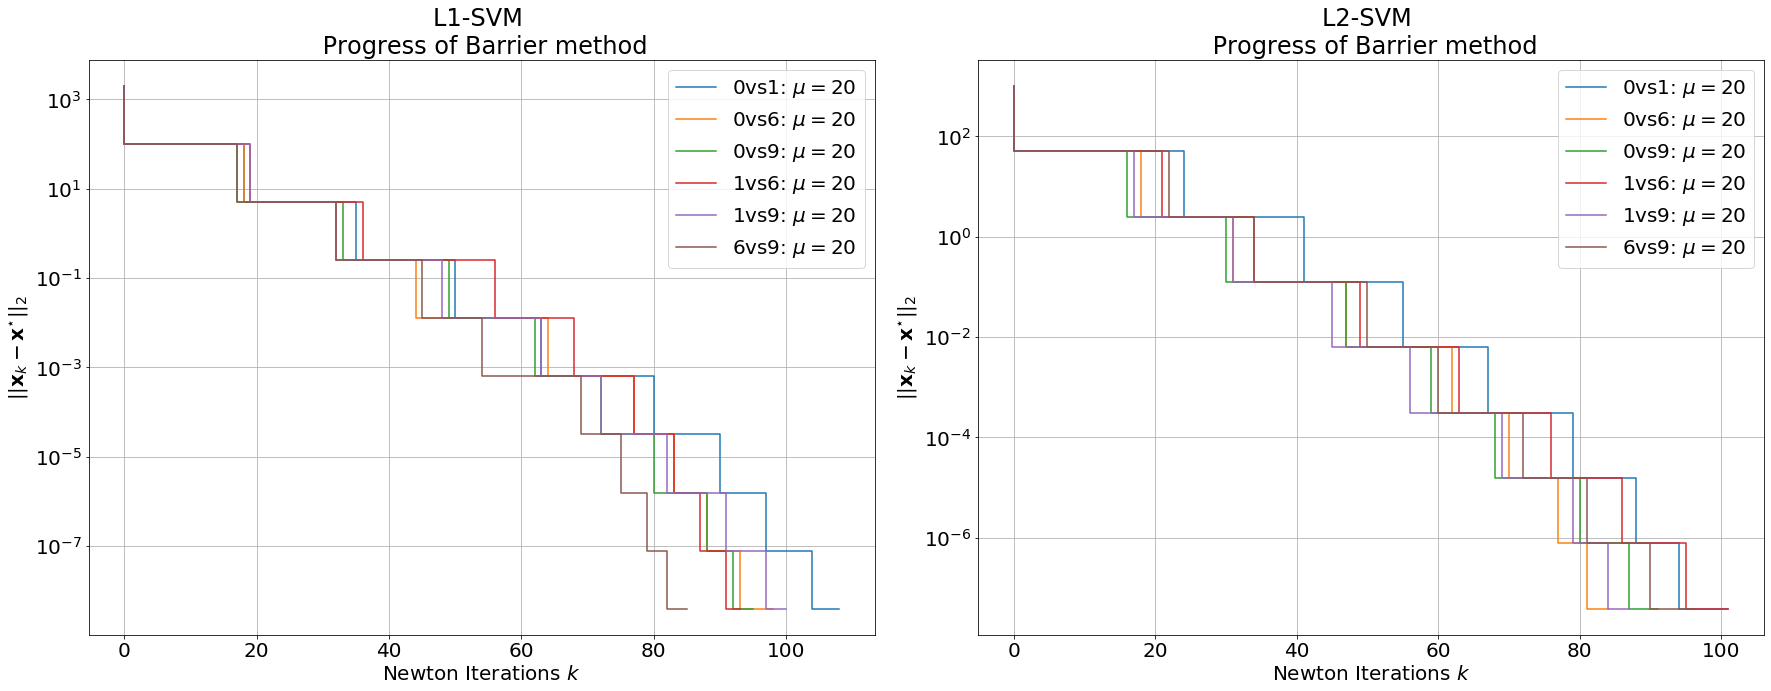

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,10))
plt.rcParams.update({'font.size': 20})

# L1-SVM
for ClassVsClass, info in L1_barrier_svm.opt_info.items():
    ax1.step(np.cumsum(info['newton_iterations']), info['duality_gaps'], 
             label=str(ClassVsClass)+": $\mu=$"+str(info['mu']))
ax1.set_title("L1-SVM \n Progress of Barrier method")
ax1.set_ylabel("$|| \mathbf{x}_k-\mathbf{x}^{\star} ||_2$")
ax1.set_xlabel("Newton Iterations $k$")
ax1.set_yscale("log")
ax1.legend()
ax1.grid(which='both', axis='both') 
    
# L2-SVM
for ClassVsClass, info in L2_barrier_svm.opt_info.items():
    ax2.step(np.cumsum(info['newton_iterations']), info['duality_gaps'], 
             label=str(ClassVsClass)+": $\mu=$"+str(info['mu']))
ax2.set_title("L2-SVM \n Progress of Barrier method")
ax2.set_ylabel("$|| \mathbf{x}_k-\mathbf{x}^{\star} ||_2$")
ax2.set_xlabel("Newton Iterations $k$")
ax2.set_yscale("log")
ax2.legend()
ax2.grid(which='both', axis='both') 
    
plt.tight_layout()
# plt.savefig("report/report_pics/barrier_duality_gap.pdf", format="pdf")
plt.show()

#### Confusion matrix

In [10]:
L1_barrier_conf_matrix = confusion_matrix(y_test, L1_barrier_yhat, normalize=None)
L2_barrier_conf_matrix = confusion_matrix(y_test, L2_barrier_yhat, normalize=None)

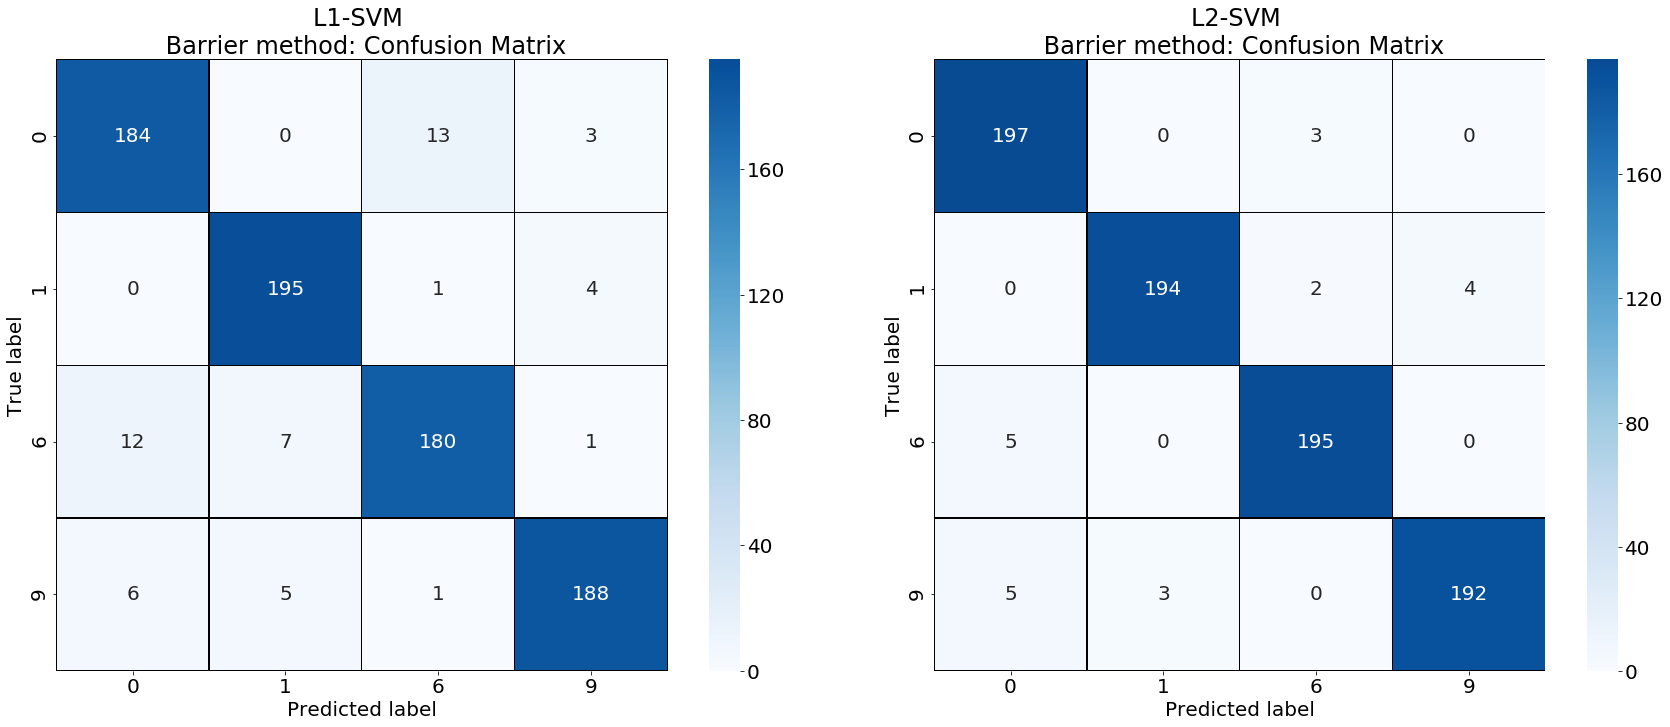

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,10))
plt.rcParams.update({'font.size': 20})
# Plot confusion matrix L1-SVM
df_cm = pd.DataFrame(L1_barrier_conf_matrix, 
                     index=np.unique(y_test),
                     columns=np.unique(y_test))
sns.heatmap(df_cm, annot=True, fmt='', cmap='Blues',
            cbar=True, square=True, center=110,
            linewidths=.1, linecolor='black', ax=ax1)
ax1.set_ylim((4,0))
ax1.set_title("L1-SVM \n Barrier method: Confusion Matrix")
ax1.set_ylabel('True label')
ax1.set_xlabel('Predicted label')

# Plot confusion matrix L2-SVM
df_cm = pd.DataFrame(L2_barrier_conf_matrix, 
                     index=np.unique(y_test),
                     columns=np.unique(y_test))
sns.heatmap(df_cm, annot=True, fmt='', cmap='Blues',
            cbar=True, square=True, center=110,
            linewidths=.1, linecolor='black', ax=ax2)
ax2.set_ylim((4,0))
ax2.set_title("L2-SVM \n Barrier method: Confusion Matrix")
ax2.set_ylabel('True label')
ax2.set_xlabel('Predicted label')

plt.tight_layout()
# plt.savefig("report/report_pics/barrier_confusion_matrix.pdf", format="pdf")
plt.show()

## SMO method

In [12]:
# Initialise L1-SVM
L1_smo_svm = SVC(C=1.0, 
                 kernel="gauss", 
                 param='scale', 
                 decision_function_shape="ovo",
                 loss_fn='L1',
                 opt_algo="smo")

# SMO fit
L1_smo_svm.fit(x_train_ovo, y_train_ovo,
               tol=1e-3, 
               max_iter=5)

# Test
L1_smo_yhat = L1_smo_svm.predict(x_test)
print("Time taken: ", L1_smo_svm.time_taken)
measure_performance(y_test, L1_smo_yhat, average="macro")

SMO method iteration:  0
SMO method iteration:  1
SMO method iteration:  2
SMO method iteration:  3
SMO method iteration:  4
SMO method iteration:  0
SMO method iteration:  1
SMO method iteration:  2
SMO method iteration:  3
SMO method iteration:  4
SMO method iteration:  0
SMO method iteration:  1
SMO method iteration:  2
SMO method iteration:  3
SMO method iteration:  4
SMO method iteration:  0
SMO method iteration:  1
SMO method iteration:  2
SMO method iteration:  3
SMO method iteration:  4
SMO method iteration:  0
SMO method iteration:  1
SMO method iteration:  2
SMO method iteration:  3
SMO method iteration:  4
SMO method iteration:  0
SMO method iteration:  1
SMO method iteration:  2
SMO method iteration:  3
SMO method iteration:  4
Time taken:  1.267246


,Accuracy,Precision,Recall,F1,MCC
0,0.9712,0.9716,0.9712,0.9713,0.9618


In [13]:
# Initialise L2-SVM
L2_smo_svm = SVC(C=1.0, 
                 kernel="gauss", 
                 param='scale', 
                 decision_function_shape="ovo",
                 loss_fn='L2',
                 opt_algo="smo")

# SMO fit
L2_smo_svm.fit(x_train_ovo, y_train_ovo,
               tol=1e-3, 
               max_iter=100)

# Test
L2_smo_yhat = L2_smo_svm.predict(x_test)
print("Time taken: ", L2_smo_svm.time_taken)
measure_performance(y_test, L2_smo_yhat, average="macro")

SMO method iteration:  0
SMO method iteration:  1
SMO method iteration:  2
SMO method iteration:  3
SMO method iteration:  4
SMO method iteration:  5
SMO method iteration:  6
SMO method iteration:  7
SMO method iteration:  8
SMO method iteration:  9
SMO method iteration:  10
SMO method iteration:  11
SMO method iteration:  12
SMO method iteration:  13
SMO method iteration:  14
SMO method iteration:  15
SMO method iteration:  16
SMO method iteration:  17
SMO method iteration:  18
SMO method iteration:  19
SMO method iteration:  20
SMO method iteration:  21
SMO method iteration:  22
SMO method iteration:  23
SMO method iteration:  24
SMO method iteration:  25
SMO method iteration:  26
SMO method iteration:  27
SMO method iteration:  28
SMO method iteration:  29
SMO method iteration:  30
SMO method iteration:  31
SMO method iteration:  32
SMO method iteration:  33
SMO method iteration:  34
SMO method iteration:  35
SMO method iteration:  36
SMO method iteration:  37
SMO method iteration: 

SMO method iteration:  19
SMO method iteration:  20
SMO method iteration:  21
SMO method iteration:  22
SMO method iteration:  23
SMO method iteration:  24
SMO method iteration:  25
SMO method iteration:  26
SMO method iteration:  27
SMO method iteration:  28
SMO method iteration:  29
SMO method iteration:  30
SMO method iteration:  31
SMO method iteration:  32
SMO method iteration:  33
SMO method iteration:  34
SMO method iteration:  35
SMO method iteration:  36
SMO method iteration:  37
SMO method iteration:  38
SMO method iteration:  39
SMO method iteration:  40
SMO method iteration:  41
SMO method iteration:  42
SMO method iteration:  43
SMO method iteration:  44
SMO method iteration:  45
SMO method iteration:  46
SMO method iteration:  47
SMO method iteration:  48
SMO method iteration:  49
SMO method iteration:  50
SMO method iteration:  51
SMO method iteration:  52
SMO method iteration:  53
SMO method iteration:  54
SMO method iteration:  55
SMO method iteration:  56
SMO method i

,Accuracy,Precision,Recall,F1,MCC
0,0.9875,0.9877,0.9875,0.9875,0.9834


#### Convergence Plots

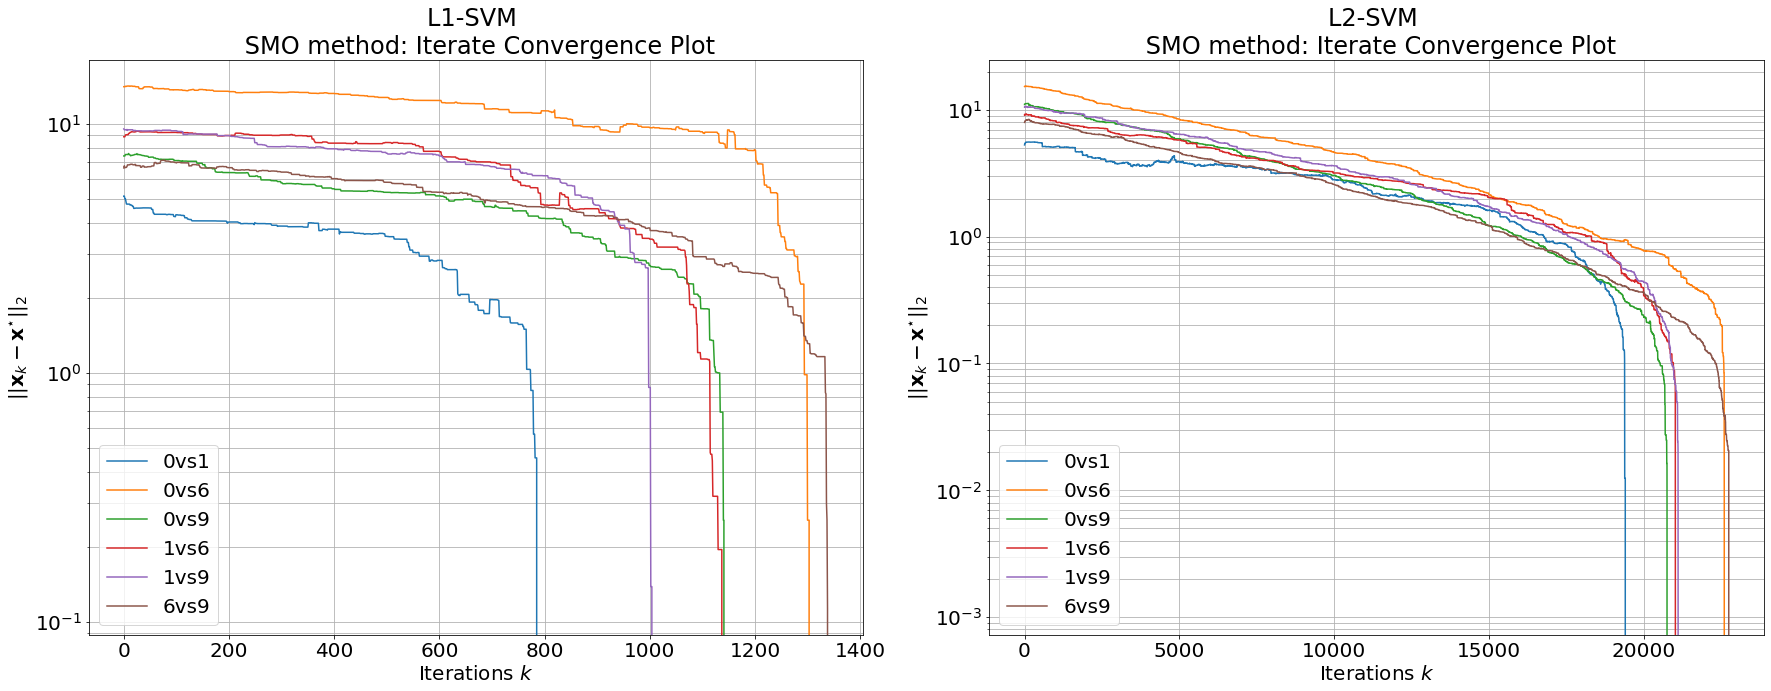

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,10))
plt.rcParams.update({'font.size': 20})

# L1-SVM
for ClassVsClass, info in L1_smo_svm.opt_info.items():
    ax1.plot(np.linalg.norm(np.array(info['iterates'])-info['x'], axis=1), label=ClassVsClass)
ax1.set_title("L1-SVM \n SMO method: Iterate Convergence Plot")
ax1.set_ylabel("$|| \mathbf{x}_k-\mathbf{x}^{\star} ||_2$")
ax1.set_xlabel("Iterations $k$")
ax1.set_yscale("log")
ax1.legend()
ax1.grid(which='both', axis='both') 
  
# L2-SVM
for ClassVsClass, info in L2_smo_svm.opt_info.items():
    ax2.plot(np.linalg.norm(np.array(info['iterates'])-info['x'], axis=1), label=ClassVsClass)
ax2.set_title("L2-SVM \n SMO method: Iterate Convergence Plot")
ax2.set_ylabel("$|| \mathbf{x}_k-\mathbf{x}^{\star} ||_2$")
ax2.set_xlabel("Iterations $k$")
ax2.set_yscale("log")
ax2.legend()
ax2.grid(which='both', axis='both') 

plt.tight_layout()
# plt.savefig("report/report_pics/smo_iterate_conv.pdf", format="pdf")
plt.show()

#### Confusion matrix

In [15]:
L1_smo_conf_matrix = confusion_matrix(y_test, L1_barrier_yhat, normalize=None)
L2_smo_conf_matrix = confusion_matrix(y_test, L2_barrier_yhat, normalize=None)

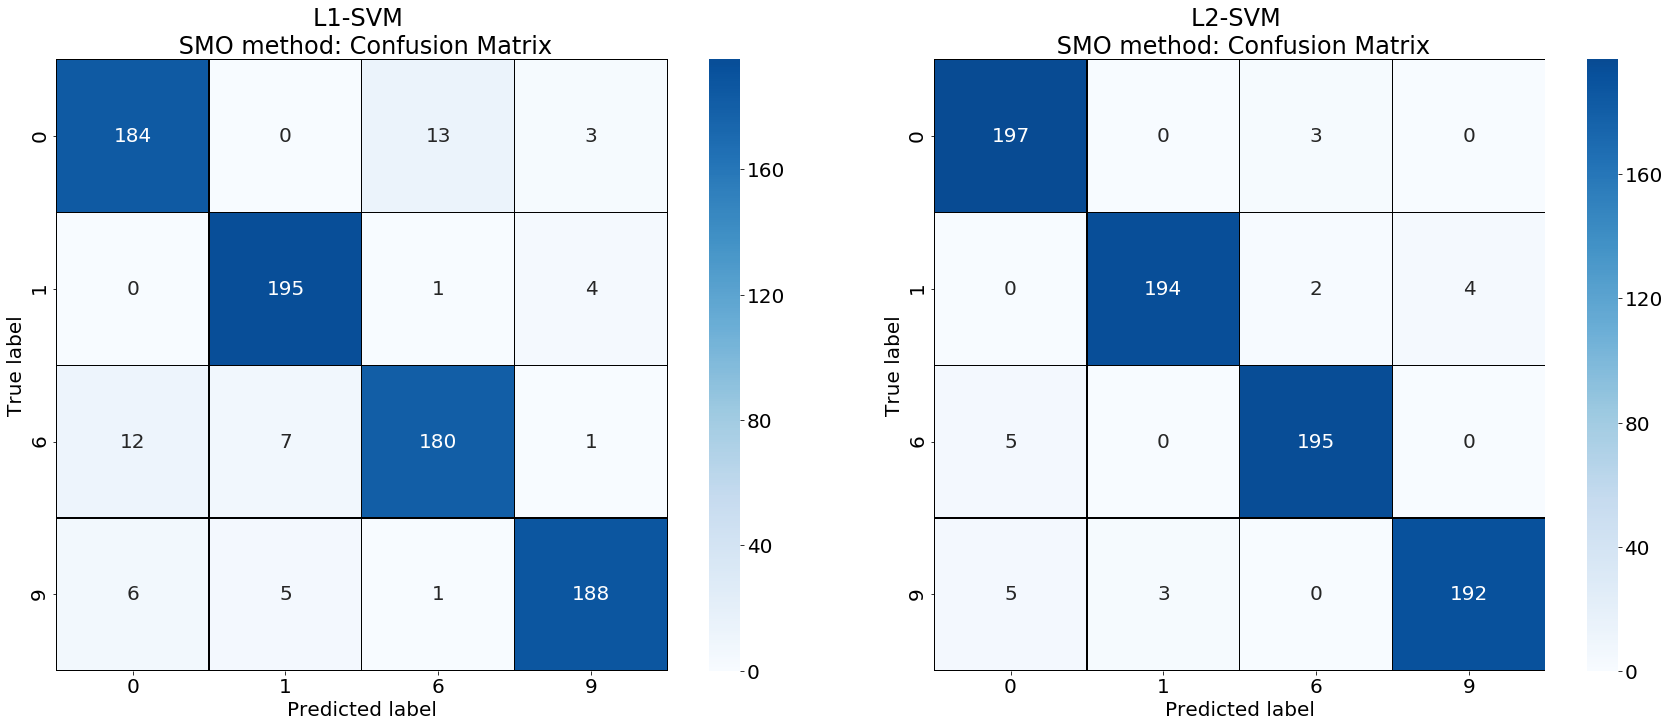

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,10))
plt.rcParams.update({'font.size': 20})
# Plot confusion matrix L1-SVM
df_cm = pd.DataFrame(L1_smo_conf_matrix, 
                     index=np.unique(y_test),
                     columns=np.unique(y_test))
sns.heatmap(df_cm, annot=True, fmt='', cmap='Blues',
            cbar=True, square=True, center=110,
            linewidths=.1, linecolor='black', ax=ax1)
ax1.set_ylim((4,0))
ax1.set_title("L1-SVM \n SMO method: Confusion Matrix")
ax1.set_ylabel('True label')
ax1.set_xlabel('Predicted label')

# Plot confusion matrix L2-SVM
df_cm = pd.DataFrame(L2_smo_conf_matrix, 
                     index=np.unique(y_test),
                     columns=np.unique(y_test))
sns.heatmap(df_cm, annot=True, fmt='', cmap='Blues',
            cbar=True, square=True, center=110,
            linewidths=.1, linecolor='black', ax=ax2)
ax2.set_ylim((4,0))
ax2.set_title("L2-SVM \n SMO method: Confusion Matrix")
ax2.set_ylabel('True label')
ax2.set_xlabel('Predicted label')

plt.tight_layout()
# plt.savefig("report/report_pics/smo_confusion_matrix.pdf", format="pdf")
plt.show()

## CVXOPT method (for comparison)

In [17]:
# Initialise L1-SVM
L1_cvxopt_svm = SVC(C=1.0, 
                    kernel="gauss", 
                    param='scale', 
                    decision_function_shape="ovo",
                    loss_fn='L1',
                    opt_algo="cvxopt")

# CVXOPT fit
L1_cvxopt_svm.fit(x_train_ovo, y_train_ovo)

# Test
L1_cvxopt_yhat = L1_cvxopt_svm.predict(x_test)
print("Time taken: ", L1_cvxopt_svm.time_taken)
measure_performance(y_test, L1_cvxopt_yhat, average="macro")

Time taken:  5.96253


,Accuracy,Precision,Recall,F1,MCC
0,0.9888,0.9889,0.9888,0.9887,0.985


In [18]:
# Initialise L2-SVM
L2_cvxopt_svm = SVC(C=1.0, 
                    kernel="gauss", 
                    param='scale', 
                    decision_function_shape="ovo",
                    loss_fn='L2',
                    opt_algo="cvxopt")

# CVXOPT fit
L2_cvxopt_svm.fit(x_train_ovo, y_train_ovo)

# Test
L2_cvxopt_yhat = L2_cvxopt_svm.predict(x_test)
print("Time taken: ", L2_cvxopt_svm.time_taken)
measure_performance(y_test, L2_cvxopt_yhat, average="macro")

Time taken:  2.766375


,Accuracy,Precision,Recall,F1,MCC
0,0.9888,0.9888,0.9888,0.9887,0.985


## Scikit-Learn SVM (for comparison)

In [19]:
# Scikit-learn for L1-SVM
from sklearn.svm import SVC as sklearnSVM
sklearn_svm = sklearnSVM(C=1.0,
                         kernel='rbf',
                         decision_function_shape='ovo') 
sklearn_svm.fit(x_train, y_train)
sklearn_pred = sklearn_svm.predict(x_test)

In [20]:
measure_performance(y_test, sklearn_pred, average="macro")

,Accuracy,Precision,Recall,F1,MCC
0,0.9912,0.9913,0.9912,0.9912,0.9884
